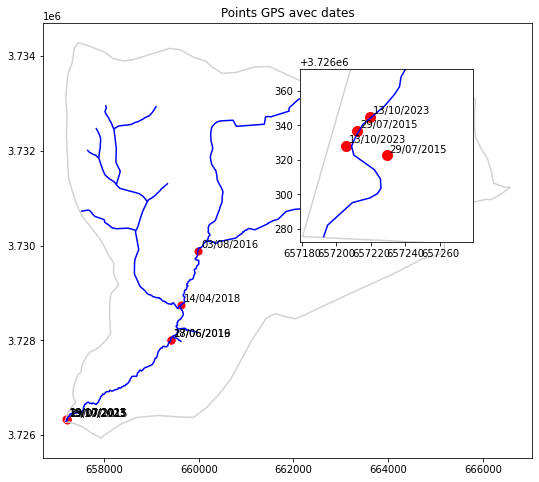

In [175]:
import pyproj
from shapely.geometry import Point
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import pandas as pd

# Créer une liste de points GPS

# Créer une fonction pour convertir les coordonnées en Lambert 93
# Créer une fonction pour convertir les coordonnées de WGS 84 (Google Earth) en Lambert 93
def convert_to_lambert(point):
    # Définir le système de coordonnées source (WGS 84)
    wgs84 = pyproj.CRS("EPSG:4326")
    
    # Définir le système de coordonnées cible (Lambert 93)
    lambert93 = pyproj.CRS("EPSG:27573")
    
    # Créer un transformateur de coordonnées
    transformer = pyproj.Transformer.from_crs(wgs84, lambert93, always_xy=True)
    
    # Effectuer la transformation
    lon, lat = point.x, point.y
    x, y = transformer.transform(lon, lat)
    
    return Point(x, y)


# Coordonnées géographiques d'origine
points_data = [
    {'name': 'point13_29_07_15', 'id': 13, 'latitude': 48.82745, 'longitude': 3.11332, 'date':"29/07/2015"},
    {'name': 'point14_29_07_15', 'id': 14, 'latitude': 48.82758, 'longitude': 3.11309, 'date':"29/07/2015"},
    {'name': 'point34_28_06_16', 'id': 34, 'latitude': 48.842323, 'longitude': 3.143102, 'date':"28/06/2016"},
    {'name': 'point35_03_08_16', 'id': 35, 'latitude': 48.85914, 'longitude': 3.15124, 'date':"03/08/2016"},
    {'name': 'point48_14_04_18','id': 48, 'latitude': 48.8489348, 'longitude': 3.1462324, 'date':"14/04/2018"},
    {'name': 'Point46_17_06_19','id':46,'latitude': 48.842323, 'longitude': 3.143102, 'date':"17/06/2019"},
    {'name': 'Point50_13_10_23','id':50,'latitude': 48.82765, 'longitude': 3.11319, 'date':"13/10/2023"},
    {'name': 'Point51_13_10_23','id':51,'latitude': 48.82750, 'longitude': 3.11300, 'date':"13/10/2023"}
]

# Créer un GeoDataFrame à partir des coordonnées géographiques
gdf = gpd.GeoDataFrame(points_data, geometry=[Point(xy) for xy in zip([point['longitude'] for point in points_data], [point['latitude'] for point in points_data])])

# Convertir les coordonnées en Lambert 93
gdf['geometry'] = gdf['geometry'].apply(convert_to_lambert)

# Charger une carte de fond (vous pouvez utiliser votre propre carte si vous le souhaitez)
bv = gpd.read_file('limites_avenelles_l3.shp')
river=gpd.read_file('reseau_hydraugraphique_l3.shp')

# Ploter les points sur la carte de fond
fig, ax = plt.subplots(figsize=(10, 8))
bv.plot(ax=ax, color='lightgray')
river.plot(ax=ax,color='blue')
gdf.plot(ax=ax, marker='o', color='red', markersize=50)

#Afficher le name des points
for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf['date']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

plt.title('Points GPS avec dates')

# Créer un inset pour le zoom
ax_inset = plt.axes([0.5, 0.5, 0.3, 0.3])  # Les arguments sont [left, bottom, width, height] en fractions de la figure
bv.plot(ax=ax_inset, color='lightgray')
river.plot(ax=ax_inset,color='blue')
gdf.plot(ax=ax_inset, marker='o', color='red', markersize=100)
#Afficher le name des points
for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf['date']):
    ax_inset.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")


# Faire un zoom sur les points qui se superposent dans l'inset
zoom_level = 50  # Ajuster en fonction de la taille de la zone que vous voulez afficher
ax_inset.set_xlim(657229.114 - zoom_level, 657229.114 + zoom_level)
ax_inset.set_ylim(3726322.585 - zoom_level, 3726322.585 + zoom_level)

plt.show()



In [176]:
gdf

,name,id,latitude,longitude,date,geometry
0,point13_29_07_15,13,48.827450,3.113320,29/07/2015,POINT (657229.114 3726322.585)
1,point14_29_07_15,14,48.827580,3.113090,29/07/2015,POINT (657212.033 3726336.931)
2,point34_28_06_16,34,48.842323,3.143102,28/06/2016,POINT (659406.889 3728003.173)
3,point35_03_08_16,35,48.859140,3.151240,03/08/2016,POINT (659987.693 3729885.537)
4,point48_14_04_18,48,48.848935,3.146232,14/04/2018,POINT (659630.191 3728743.183)
5,Point46_17_06_19,46,48.842323,3.143102,17/06/2019,POINT (659406.889 3728003.173)
6,Point50_13_10_23,50,48.827650,3.113190,13/10/2023,POINT (657219.327 3726344.810)
7,Point51_13_10_23,51,48.827500,3.113000,13/10/2023,POINT (657205.487 3726327.942)


In [177]:
params = gpd.read_file('inversion/Inversé/params.csv',sep=',', index_col=0)

DriverError: inversion/Inversé/params.csv: No such file or directory

In [ ]:
params

,id,moinslog10K,n,lambda_s,rho_cs,regime,geometry
0,13,8.993473,0.20017026,3.971283,3236276.8,1,None
1,14,8.19269,0.045820475,1.0038893,9936161.0,-1,None
2,34,7.61579230,0.199496812,6.120214,4970023.0288,1,None
3,35,8.757264,0.23111247,3.7167053,5358492.5,-1,None
4,46,8.95535,0.2010963,2.7319505,9035180.0,-1,None
5,48,7.943059,0.21056272,7.1972322,2951451.5,-1,None
6,50,9.234397,0.0077978037,8.717235,547835.8,1,None
7,51,8.593209,0.16459486,3.2793343,24324440.0,1,None


<ipython-input-171-abf575375666>:17: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


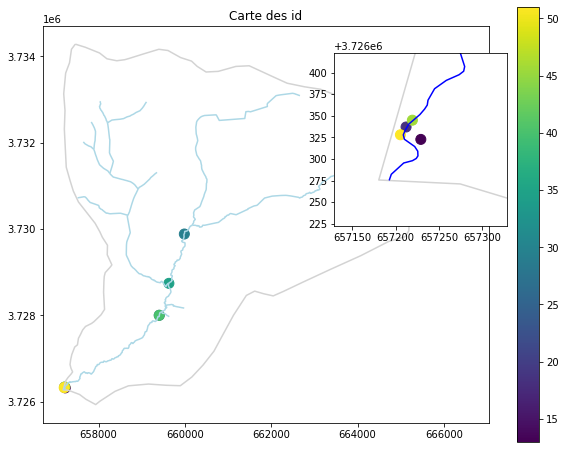

<ipython-input-171-abf575375666>:17: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


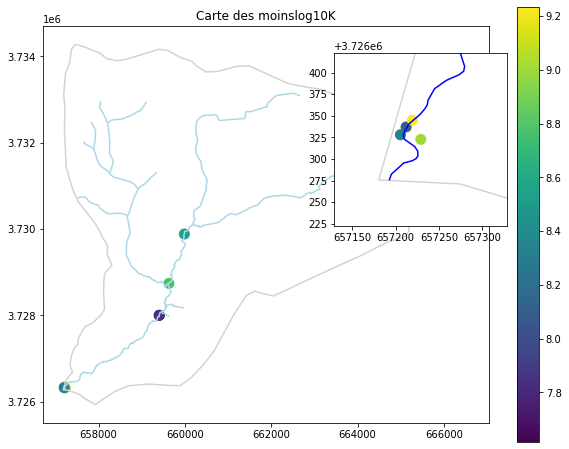

<ipython-input-171-abf575375666>:17: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


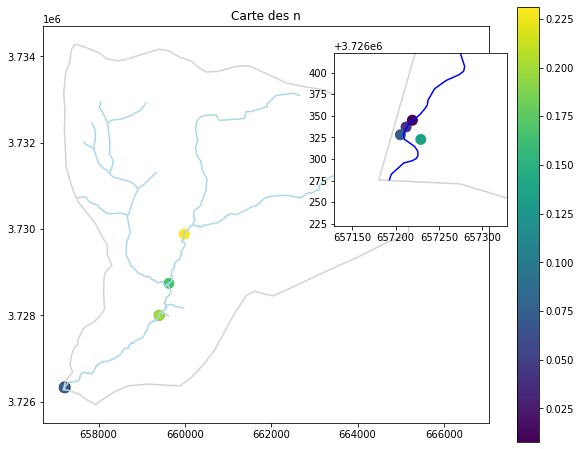

<ipython-input-171-abf575375666>:17: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


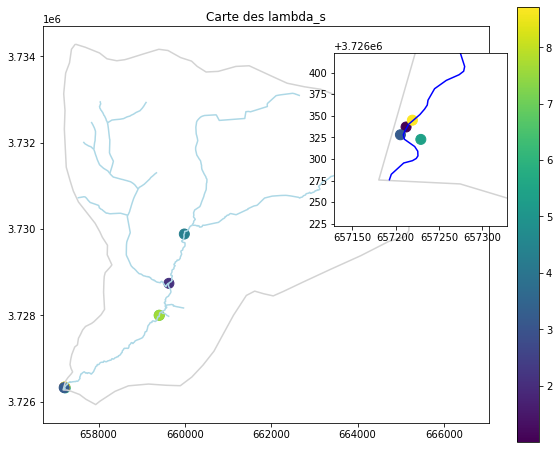

<ipython-input-171-abf575375666>:17: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


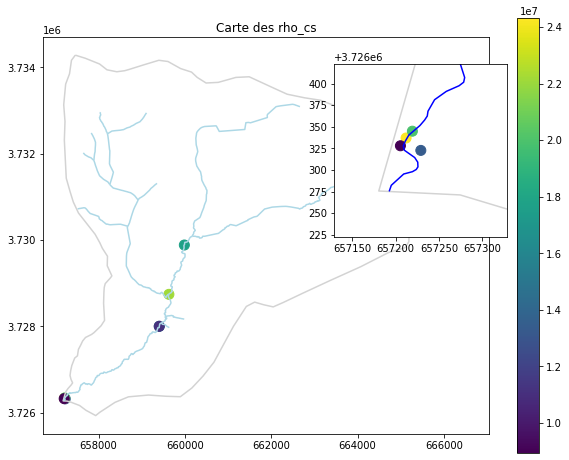

<ipython-input-171-abf575375666>:17: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


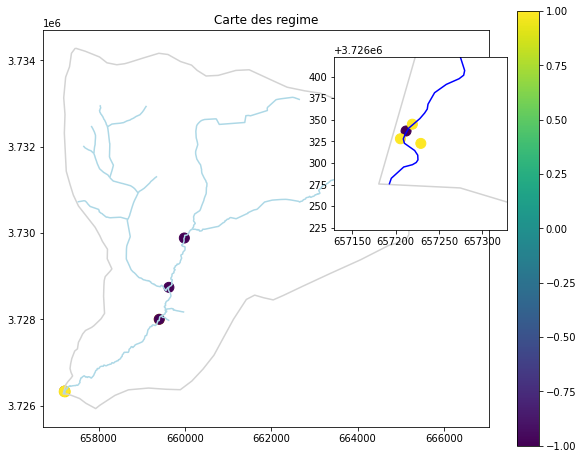

IndexError: index 0 is out of bounds for axis 0 with size 0

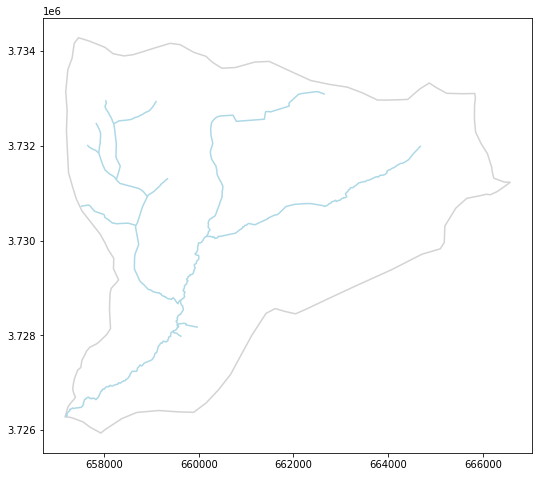

In [ ]:
#Afficher les carte des paramètres
for param in params : 
    # Charger une carte de fond (vous pouvez utiliser votre propre carte si vous le souhaitez)
    bv = gpd.read_file('limites_avenelles_l3.shp')
    river=gpd.read_file('reseau_hydraugraphique_l3.shp')

    # Ploter les points sur la carte de fond
    fig, ax = plt.subplots(figsize=(10, 8))
    bv.plot(ax=ax, color='lightgray')
    river.plot(ax=ax,color='lightblue')
    gdf.plot(ax=ax, marker='o', column=params[param], cmap='viridis', markersize=100, legend=False)
    
    plt.title(f'Carte des {param}')
    #afficher la legende sous forme de barre
    sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=params[param].min(), vmax=params[param].max()))
    sm._A = []
    plt.colorbar(sm)

    # Créer un inset pour le zoom
    ax_inset = plt.axes([0.5, 0.5, 0.3, 0.3])  # Les arguments sont [left, bottom, width, height] en fractions de la figure
    bv.plot(ax=ax_inset, color='lightgray')
    river.plot(ax=ax_inset,color='blue')
    gdf.plot(ax=ax_inset, marker='o', column=params[param], cmap='viridis', markersize=100, legend=False)


    # Faire un zoom sur les points qui se superposent dans l'inset
    zoom_level = 100  # Ajuster en fonction de la taille de la zone que vous voulez afficher
    ax_inset.set_xlim(657229.114 - zoom_level, 657229.114 + zoom_level)
    ax_inset.set_ylim(3726322.585 - zoom_level, 3726322.585 + zoom_level)

    plt.show()

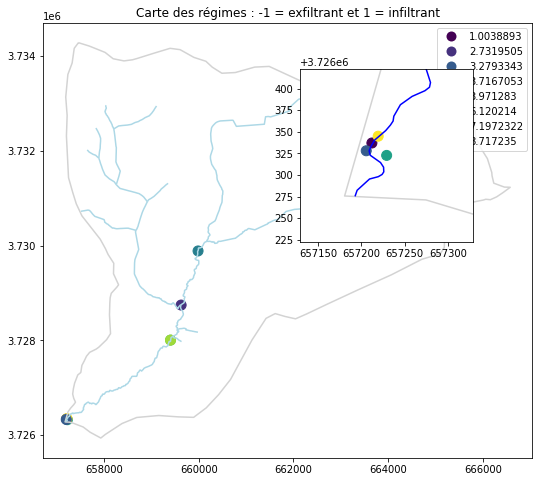

In [ ]:
# Charger une carte de fond (vous pouvez utiliser votre propre carte si vous le souhaitez)
bv = gpd.read_file('limites_avenelles_l3.shp')
river=gpd.read_file('reseau_hydraugraphique_l3.shp')

# Ploter les points sur la carte de fond
fig, ax = plt.subplots(figsize=(10, 8))
bv.plot(ax=ax, color='lightgray')
river.plot(ax=ax,color='lightblue')
gdf.plot(ax=ax, marker='o', column=params['lambda_s'], cmap='viridis', markersize=100, legend=True)
    
#afficher la legende sous forme de barre
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=params[param].min(), vmax=params['n'].max()))
sm._A = []
plt.colorbar(sm)    
plt.title(f'Carte des régimes : -1 = exfiltrant et 1 = infiltrant')
# Créer un inset pour le zoom
ax_inset = plt.axes([0.5, 0.5, 0.3, 0.3])  # Les arguments sont [left, bottom, width, height] en fractions de la figure
bv.plot(ax=ax_inset, color='lightgray')
river.plot(ax=ax_inset,color='blue')
gdf.plot(ax=ax_inset, marker='o', column=params['lambda_s'], cmap='viridis', markersize=100, legend=False)


# Faire un zoom sur les points qui se superposent dans l'inset
zoom_level = 100  # Ajuster en fonction de la taille de la zone que vous voulez afficher
ax_inset.set_xlim(657229.114 - zoom_level, 657229.114 + zoom_level)
ax_inset.set_ylim(3726322.585 - zoom_level, 3726322.585 + zoom_level)

plt.show()